# 신경망 데이터 표현

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["seaborn-v0_8-whitegrid"])

## 텐서(Tensor)
- 일반적으로 텐서는 3차원 이상을 다룰 때 표현하는 방식이지만, 여기서는 어떠한 데이터를 표현할 때, 그 값 모두를 텐서라고 부르기로 함

      a = np.array([1, 2])
      b = np.array([[1, 2],
                    [3, 4]])
      c = np.array([10]) 
      d = np.array(3)  
  
    a, b, c, d 모두 텐서라고 지칭할 수 있음
  
- 랭크(rank): 텐서의 축을 나타내고, 넘파이(numpy)의 `ndim`으로 구할 수 있음

      a = np.array([1, 2])
        >> ndim = 1  
      b = np.array([[1, 2],
                    [3, 4]])
        >> ndim = 2
      d = np.array(3)
        >> ndim = 0
      
    위의 예시에서 알 수 있듯이 대괄호( [ ] )의 개수가 곧 랭크(축)의 값
    
      
- 크기(shape): 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내며, 파이썬의 튜플(tuple) 형태


## 그림으로 이해하기

![array](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png)
<br /><sub>출처: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch01.html</sub>

## 스칼라(0차원 텐서)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 형상은 없음

In [2]:
x = np.array(3)
print(x)
print(x.shape)
print(np.ndim(x))


3
()
0


## 벡터(1차원 텐서)
- 숫자의 배열을 나타내는 텐서


In [4]:
x = np.array([1, 2, 3, 4])
print(x)
print(x.shape)
print(np.ndim(x))


[1 2 3 4]
(4,)
1


### 벡터의 합
- 같은 형상(shape)일 때, 각 원소별로 계산

In [7]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = a + b
print(a)
print(b)
print(c)
print(c.shape)
print(np.ndim(c))


[1 2 3 4]
[5 6 7 8]
[ 6  8 10 12]
(4,)
1


### 벡터의 곱
-  $A = (x_1, \ x_2, \ x3, \ ..., \ x_n)$  
  $B = (y_1, \ y_2, \ y3, \ ..., \ y_n)$ 일 때,
- 원소곱
  - 같은 형상(shape)일 때, 각 원소별로 계산   
   
    $A \times B = (x_1, \ x_2, \ x_3, \ ..., \ x_n) \times (y_1, \ y_2, \ y_3, \ ..., \ y_n) \\   
    \qquad = (x_1y_1, \ x_2y_2, \ x_3y_3, \ ... \ ,  \ x_ny_n)  $
    
- 벡터곱(product, dot)
  - 두 1차원 벡터가 있을 때 **각각의 성분끼리의 곱을 모두 더하는 계산**  
  
    $A \bullet B \Rightarrow A \times B^T = (x_1, \ x_2, \ x_3, \ ..., \ x_n) \begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ ... \\ y_n  \end{pmatrix} \\  
    \qquad = (x_1y_1 + \ x_2y_2 + \ x_3y_3 + \ ... + \ x_ny_n)  $

    **원소곱은 1차원 텐서로 뜨지만, 벡터곱은 스칼라가 된 걸 유의**
  

In [11]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = a * b
print(c)
print(c.shape)
print(np.ndim(c))
print("--------")
x = np.array([1, 2, 0])
y = np.array([0, 2, 1])
z = np.dot(x, y)
print(z)
print(z.shape)
print(np.ndim(z))

[ 5 12 21 32]
(4,)
1
--------
4
()
0


## 스칼라와 벡터의 곱


In [15]:
a = np.array(10)
b = np.array([1, 2, 3])
print(a * b)


[10 20 30]


## 2차원 텐서(행렬)
- 2차원 텐서는 행렬로 생각할 수 있음
    - (m, n) 형상의 배열

![matrix](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Matrix_ko.svg/570px-Matrix_ko.svg.png)
<br /><sub>출처: https://ko.wikipedia.org/wiki/%ED%96%89%EB%A0%AC</sub>


In [20]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
print(matrix)
print(matrix.shape)
print(np.ndim(matrix))
print("-----------")
matrix2 = np.array([1, 2, 3, 4])
print(matrix2)
print(matrix2.shape)
print(np.ndim(matrix2))

[[1 2 3]
 [4 5 6]]
(2, 3)
2
-----------
[1 2 3 4]
(4,)
1


### 행렬 원소곱
- 같은 형상(shape)일 때 덧셈, 곱셈과 같은 연산은 원소별로 진행


In [26]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[10, 10], [10, 10]])
print("a:", a)
print("b", b)
print("a * b", a * b)


a: [[1 2]
 [3 4]]
b [[10 10]
 [10 10]]
a * b [[10 20]
 [30 40]]


### 행렬 점곱(내적, product)
- 1차원 벡터와 마찬가지로 앞 행렬의 열과 뒤 행렬의 행의 수가 같아야함

In [31]:
M = np.array([[1, 2], [3, 4]])
N = np.array([[2, 3, 4], [2, 3, 4]])
print("행렬 M\n", M)
print("행렬 M\n", N)
L = np.dot(M, N)
print("행렬 L\n", L)
print(L.shape)
print(np.ndim(L))


행렬 M
 [[1 2]
 [3 4]]
행렬 M
 [[2 3 4]
 [2 3 4]]
행렬 L
 [[ 6  9 12]
 [14 21 28]]
(2, 3)
2


### 역행렬
- 어떤 행렬 A가 있을 때, 곱해서 단위행렬(E)를 만드는 행렬 B가 존재한다면, 행렬 B는 A의 역행렬

In [34]:
a = np.array([[1, 2], [3, 4]])
print(a)
b = np.linalg.inv(a)
print(b)

print(a @ b)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [36]:
b = np.array([[3, 3], [2, 2]])
print(np.linalg.inv(b))
# 행렬식 ad-bc가 0이 되어서 inf와 가깝게 출력된 모습

[[ 6.00479950e+15 -9.00719925e+15]
 [-6.00479950e+15  9.00719925e+15]]


### 전치행렬
- 행과 열을 바꾼 배열의 형태

![](https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif)
<br /><sub>출처: https://ko.wikipedia.org/wiki/%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC</sub>

In [39]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print("a\n", a)
print("a.T\n", a.T)


a
 [[1 2 3]
 [4 5 6]]
a.T
 [[1 4]
 [2 5]
 [3 6]]


## 3차원 텐서
- 보통 이미지를 나타낼 때 사용되는 텐서
  - (width, height, channels)
  - 일반적으로 Numpy array로 표현  
![3d tensor](https://image.slidesharecdn.com/tensordecomposition-170301235239/95/a-brief-survey-of-tensors-5-638.jpg)
<br /><sub>출처: https://www.slideshare.net/BertonEarnshaw/a-brief-survey-of-tensors</sub>
- 시계열 데이터 또는 시퀀스(sequence) 데이터를 표현할 때도 사용
  - (samples, timesteps, features)
  - (예시) 주식 가격 데이터셋, 시간에 따른 질병 발병 건수  
![](https://kr.mathworks.com/help/deeplearning/examples/timeseriesforecastingusingdeeplearningexample_01_ko_KR.png)
<br /><sub>출처: https://kr.mathworks.com/help/deeplearning/examples/time-series-forecasting-using-deep-learning.html</sub>

In [45]:
X = np.array(
    [
        [[5, 3, 2, 1], [5, 5, 3, 1], [6, 1, 2, 3]],
        [[1, 1, 1, 1], [3, 4, 7, 5], [1, 8, 3, 4]],
        [[10, 9, 3, 9], [5, 4, 3, 2], [7, 6, 3, 4]],
    ]
)
print("X\n", X, end="\n\n")
print("X.shape:", X.shape)
print("X.ndim:", X.ndim)

X
 [[[ 5  3  2  1]
  [ 5  5  3  1]
  [ 6  1  2  3]]

 [[ 1  1  1  1]
  [ 3  4  7  5]
  [ 1  8  3  4]]

 [[10  9  3  9]
  [ 5  4  3  2]
  [ 7  6  3  4]]]

X.shape: (3, 3, 4)
X.ndim: 3


In [46]:
X.T

array([[[ 5,  1, 10],
        [ 5,  3,  5],
        [ 6,  1,  7]],

       [[ 3,  1,  9],
        [ 5,  4,  4],
        [ 1,  8,  6]],

       [[ 2,  1,  3],
        [ 3,  7,  3],
        [ 2,  3,  3]],

       [[ 1,  1,  9],
        [ 1,  5,  2],
        [ 3,  4,  4]]])

### 3차원 텐서 활용 예시(이미지)
- MNIST Dataset
- 28x28 사이즈의 gray scale 이미지들로 구성  
![이미지](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png)  
<sub>출처: https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4</sub>

  
- gray scale: 0~255의 값을 통해 밝기를 표현 
  0으로 갈수록 어두워지고, 255로 갈수록 밝아짐 
![이미지](https://miro.medium.com/max/1400/1*euc4RxnNo78LFEGrb-QZ7w.jpeg)  
<sub>출처: https://medium.com/@himnickson/converting-rgb-image-to-the-grayscale-image-in-java-9e1edc5bd6e7</sub>



In [47]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [48]:
print(train_images.ndim)

3


In [49]:
print(train_images.dtype)

uint8


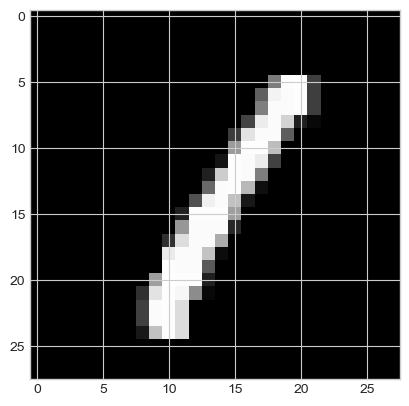

In [53]:
temp_image = train_images[3]
plt.imshow(temp_image, cmap="gray")
plt.show()


## 브로드캐스팅(broadcasting)
- 넘파이에서 다른 형상(shape)끼리 계산 가능

- 1차원 텐서

![1d](https://numpy.org/doc/1.18/_images/theory.broadcast_1.gif)

- 2차원 텐서

![2d](https://numpy.org/doc/1.18/_images/theory.broadcast_2.gif)

- 더 작은 형상(shape)이 형상이 더 큰 배열에 확장 가능해야함

![broadcast](https://numpy.org/doc/1.18/_images/theory.broadcast_3.gif) 

- (참고) 아래의 경우도 가능

![broadcast](https://numpy.org/doc/1.18/_images/theory.broadcast_4.gif)

<br /><sub>https://numpy.org/doc/1.18/user/theory.broadcasting.html#array-broadcasting-in-numpy</sub>

In [54]:
a = np.array(10)
b = np.array([10, 20, 30])
print(np.dot(a, b))
print(a * b)

[100 200 300]
[100 200 300]


In [57]:
a = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
print("행렬 a\n", a)
print("행렬 b\n", b)
print("행렬 a*b\n", a * b)

행렬 a
 [[1 2]
 [3 4]]
행렬 b
 [10 20]
행렬 a*b
 [[10 40]
 [30 80]]


In [59]:
A = np.array([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
B = np.array([[10, 10, 10]])
print("행렬 A\n", A)
print("A. shape:", A.shape)
print("행렬 B\n", B)
print("B. shape: ", B.shape)
print("A * B\n", A * B)


행렬 A
 [[[1 1 1]
  [2 2 2]]

 [[3 3 3]
  [4 4 4]]]
A. shape: (2, 2, 3)
행렬 B
 [[10 10 10]]
B. shape:  (1, 3)
A * B
 [[[10 10 10]
  [20 20 20]]

 [[30 30 30]
  [40 40 40]]]


## 4, 5차원 텐서
- Color Image Datasets(4차원)
  - (samples, height, width, channels) ( Keras, Tensorflow )
  - (samples, channels, height, width) ( Pytorch )


- 동영상(5차원)
  1. (samples, frames, height, width, channels)
  2. (samples, frames, channels, height, width)
  - 예시 1) (4, 300, 1920, 1080, 3) 
    - 1920x1080 사이즈 3채널의 300프레임 수를 가진 배치가 4개

## 텐서 크기 변환
- reshape로 텐서의 크기 변환 가능
- **변환 전의 원소의 개수와 변환 이후의 텐서의 개수가 같아야** 함

In [69]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print("A\n", a)
print("A.shape:", a.shape)
a = a.reshape(6)
print("A.shape:", a.shape)

A
 [[1 2 3]
 [4 5 6]]
A.shape: (2, 3)
A.shape: (6,)


- -1 을 통해 자동으로 형상을 지정 가능  
  원소의 갯수에 맞게 넘파이가 자동으로 형상을 지정  
      (2, 2, 3) -> (3, -1)     (O)
                -> (2, 1, 6)   (O)
                -> (2, -1, -1) (X)
                -> (2, 5, -1)  (X) 

In [73]:
B = np.array([[[2, 3, 4], [2, 3, 4]], [[1, 1, 1], [1, 1, 1]]])
print("행렬 B\n", B)
print("B.shape:", B.shape)
print("---------")
B = B.reshape(4, -1)
print("B. shape:", B.shape)
print(B)


행렬 B
 [[[2 3 4]
  [2 3 4]]

 [[1 1 1]
  [1 1 1]]]
B.shape: (2, 2, 3)
---------
B. shape: (4, 3)
[[2 3 4]
 [2 3 4]
 [1 1 1]
 [1 1 1]]
